In [61]:
from math import *

def count_collisions_until_hit(a, b, l, sphere_x, sphere_y, sphere_r, angle):
    def intersect_sphere(x, y, angle):
        dx = sphere_x - x
        dy = sphere_y - y
        return abs(angle - atan2(dy, dx)) < asin(sphere_r / sqrt(dx**2+dy**2))

    def collide(x, y, angle):
        wall, t = min([
                ("left",       -x  / cos(angle)),
                ("right",  (a - x) / cos(angle)),
                ("bottom",     -y  / sin(angle)),
                ("top",    (b - y) / sin(angle)),
            ],  key = lambda c : c[1] if c[1] > .001 else float("inf")) # Minimal positive distance
        new_x = 0 if wall == 'left' else a if wall == 'right' else x + t * cos(angle)
        new_y = 0 if wall == 'bottom' else b if wall == 'top' else y + t * sin(angle)
        new_angle = pi - angle if wall in ['left', 'right'] else -angle
        return new_x, new_y, new_angle

    i = 0
    yield (state := (l, 0, angle * pi / 180))
    while not intersect_sphere(*state) and (i := i + 1) < 10000:
        yield (state := collide(*state))
    yield (state := collide(*state))

In [62]:
a, b, l, angle = 7, 5, 2, 10
sphere_x, sphere_y, sphere_r = 6, 4, .4
path = list(count_collisions_until_hit(a, b, l, sphere_x, sphere_y, sphere_r, angle))
print("Collisions made:", len(path)-2)

Collisions made: 5


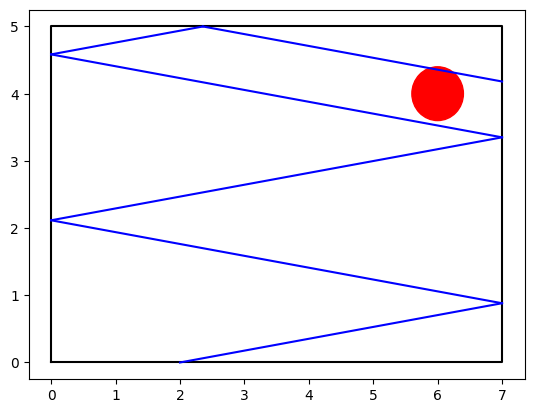

In [63]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
plt.subplots()[1].add_patch(Circle((sphere_x, sphere_y), sphere_r, color='r'))
plt.plot([0, a, a, 0, 0], [0, 0, b, b, 0], 'k-') # Box

for (x1, y1, _), (x2, y2, _) in zip(path, path[1:]):
    plt.plot([x1, x2], [y1, y2], 'b')